## Laporan
- Harvest Walukow
- 164231104

In [ ]:
# pip install openpyxl
# pip install imblearn

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns

In [4]:
df = pd.read_excel('ExerciseSAClass.xlsx')

In [9]:
df.head()

,Post ID,Post description,Date,Language,Translated Post Description,Sentiment,Hate
0,CgXDOaQDvGm,“I have decided that the global #monkeypox out...,07/23/2022,English,“I have decided that the global #monkeypox out...,neutral,Not Hate
1,CgXpRmMIdzG,In light of the evolving monkeypox outbreak wi...,07/23/2022,English,In light of the evolving monkeypox outbreak wi...,neutral,Not Hate
2,CgXaFGDsevq,If you've been hearing about monkeypox and wan...,07/23/2022,English,If you've been hearing about monkeypox and wan...,neutral,Not Hate
3,CgXGNrmLwoL,Monkeypox is a rare disease caused by infectio...,07/23/2022,English,Monkeypox is a rare disease caused by infectio...,neutral,Not Hate
4,CgXTqcjOQD-,For today's @newyorkermag dispatch. \n'The Ago...,07/23/2022,English,For today's @newyorkermag dispatch. \n'The Ago...,negative,Not Hate


In [8]:
df[df['Language'] == 'Portuguese'].head()

,Post ID,Post description,Date,Language,Translated Post Description,Sentiment,Hate
8,CgXclY6uupc,MONKEYPOX: OMS declara que surto da doença con...,07/23/2022,Portuguese,MONKEYPOX: WHO declares outbreak of disease co...,neutral,Not Hate
38,Cgcc4YqMuzX,"O que você precisa saber sobre monkeypox, tamb...",07/25/2022,Portuguese,"What do you need to know about monkeypox, also...",neutral,Not Hate
41,CgcQOizOUMY,Surto de Monkeypox não vem dos macacos!\nA Clí...,07/25/2022,Portuguese,Monkeypox outbreak does not come from monkeys!...,neutral,Not Hate
63,Cge9WeLOeZl,#Repost @saesp.anestesia with @use.repost\n・・・...,07/26/2022,Portuguese,#Repost @saesp.anestesia with @use.repost ・・・ ...,negative,Not Hate
65,CgfvBKds1nc,NOTA - Monkeypox Em Nazaré Do Tocantins Pacien...,07/26/2022,Portuguese,NOTE - Monkeypox In Nazaré Do Tocantins Patien...,neutral,Not Hate


In [26]:
df[df['Language'] == 'Portuguese']['Sentiment'].value_counts()

Sentiment
neutral     4254
negative     615
positif      376
Name: count, dtype: int64

In [ ]:
# LABEL MAPPING & TRAIN/TEST SPLIT
label_map = {'negative':0, 'neutral':1, 'positif':2}
df['label_num'] = df['Sentiment'].map(label_map)

# Filter untuk bahasa Português dan hapus baris dengan nilai NaN
df_portugal = df[df['Language'] == 'Portuguese'].dropna(subset=['Translated Post Description', 'label_num'])

X_train, X_test, y_train, y_test = train_test_split(
    df_portugal['Translated Post Description'], 
    df_portugal['label_num'], 
    test_size=0.2,
    random_state=42,
    stratify=df_portugal['label_num']
)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

# TF-IDF VECTORIZATION
tfidf = TfidfVectorizer(lowercase=True, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

Train size: 4196, Test size: 1049


In [22]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm = svm_model.predict(X_test_tfidf)

print(classification_report(y_test, y_pred_svm, target_names=['negative','neutral','positif']))


              precision    recall  f1-score   support

    negative       0.75      0.44      0.55       123
     neutral       0.87      0.97      0.92       851
     positif       0.71      0.29      0.42        75

    accuracy                           0.86      1049
   macro avg       0.78      0.57      0.63      1049
weighted avg       0.85      0.86      0.84      1049



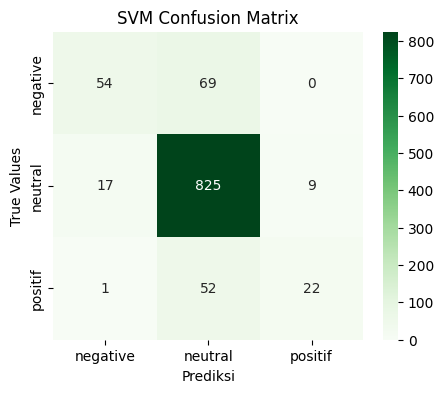

In [28]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(5,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['negative','neutral','positif'], 
            yticklabels=['negative','neutral','positif'])
plt.title("SVM Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("True Values") 
plt.show()